# Binary Bird Classifer from Using CNN

Open Soundscape: http://opensoundscape.org/en/latest/train.html

First, use the following packages to create a machine learning classifier. First, from OpenSoundscape import the following three functions (`run_command`, `binary_train_valid_split`, and `train`) and three classes (`Audio`, `Spectrogram`, and `SingleTargetAudioDataset`).

In [4]:
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram
from opensoundscape.datasets import SingleTargetAudioDataset

from opensoundscape.helpers import run_command
from opensoundscape.data_selection import binary_train_valid_split
from opensoundscape.torch.train import train

# For working with dataframes, arrays, and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For importing data / audio-related python library
import librosa
import os
import os.path
import pandas as pd


# Extract files from csv provided after Gabriel's binary bird classifier 


# Split the data into n-segment chunks

## Import Data
Import all the audio files and resample to 22050Hz (not 44.1kHz) and then save each 5 second clip to another directory.
Make sure to make a directory manually of where you would like your clipped files to go to. 

In [186]:
def find_n_second_multiples_and_filenames(dir_path, des_dir_path, n): 
    """ 
    dir_path (path): path of a directory with files you want to separate into 5 second clips
    des_dir_path (path): path of a directroy 
    n (int): split data into n-second clips
    wav_data (n dimensional list)
    """
    
    clip_wav_data = []
    allfilenames = []
    timestamp = []

    for filename in os.listdir(dir_path):
        filename_head = os.path.splitext(filename)[0]
        filename_tail = os.path.splitext(filename)[1]
        filepath = os.path.join(dir_path, filename)
        
        # issue is here with resampling
        data, sr = librosa.load(filepath, sr=22050)

        num_samples_in_n_seconds =  n  * sr 
        
        length_data = len(data)
        length_in_seconds = length_data / sr 

        if length_data < num_samples_in_n_seconds: 
            pass
        
        elif length_data > num_samples_in_n_seconds: 
            
            if length_data % num_samples_in_n_seconds == 0: 
                # multiples of n
                num_of_n_second_clips = length_data / num_samples_in_n_seconds

                for i in range(int(num_of_n_second_clips)): 
                    data_n_second_clip = data[i*num_samples_in_n_seconds:(i+1)*num_samples_in_n_seconds]
                    
                    start_in_seconds = (i*num_samples_in_n_seconds)/sr
                    end_in_seconds = ((i+1)*num_samples_in_n_seconds)/sr
                    new_filename = filename_head + ' - %d%s_%d%s' % (start_in_seconds,'s',end_in_seconds,'s') + filename_tail
                    
                    allfilenames.append(new_filename)
                    new_directory = os.path.join(des_dir_path, new_filename)

                    # write file
                    librosa.output.write_wav(new_directory, data_n_second_clip, sr)
            else: 
                data = data[:-(length_data % num_samples_in_n_seconds)]
            
                num_of_n_clips = int(np.floor(length_data / num_samples_in_n_seconds))

                for i in range(num_of_n_clips): 
                    start_in_seconds = (i*num_samples_in_n_seconds)/sr
                    end_in_seconds = ((i+1)*num_samples_in_n_seconds)/sr

                    data_n_seconds = data[i*num_samples_in_n_seconds:(i+1)*num_samples_in_n_seconds]
                    timestamp.append([i*n,(i+1)*n])

                    # filename 
                    new_filename = filename_head + ' - %d%s_%d%s' % (start_in_seconds,'s',end_in_seconds,'s') + filename_tail
                    allfilenames.append(new_filename)
                
                    new_directory = os.path.join(des_dir_path, new_filename)

                    # write file
                    librosa.output.write_wav(new_directory, data_n_seconds, sr)

        else: #length_data == num_samples_in_n_seconds: 
            allfilenames.append(filename)

            new_directory = os.path.join(des_dir_path, filename)
            librosa.output.write_wav(new_directory, data, sr)
            
    return allfilenames, timestamp


Make the directories for split files from the Audioset and Xeno Canto audiosets.

In [189]:
import os.path
from os import path

split_path_audioset = os.path.join('/media/e4e/Rainforest_Data1/','audioset_nonbird_split')
os.mkdir(split_path_audioset)

#if not split_path_audioset.exists(): split_path_audioset.mkdir()

In [190]:
split_path_xenocanto = os.path.join('/media/e4e/Rainforest_Data1/', 'Madre_de_Dios_Xeno_Canto_Birdcalls_Split')
os.mkdir(split_path_xenocanto)

#if not split_path_xenocanto.exists(): split_path_xenocanto.mkdir()

Spltting the data from the Audioset and Xeno Canto data.

In [191]:
original_audioset_path = '/media/e4e/Rainforest_Data1/audioset_nonbird'
allfilenames_audioset, timestamp_audioset = find_n_second_multiples_and_filenames(original_audioset_path, split_path_audioset, 5)

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

In [192]:
original_xenocanto_path = '/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls'
allfilenames_bird, timestamp_bird = find_n_second_multiples_and_filenames(original_xenocanto_path, split_path_xenocanto, 5)

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-spec

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclo

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclo

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclo

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclo

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclo

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=72>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/audioread/__init__.py:86: ResourceWarning: unclosed file <_io.BufferedReader name=74>
  if ffdec.available():
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in l

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensounds

Validate the split files through finding their spectrograms from the Audioset and Xeno Canto data.

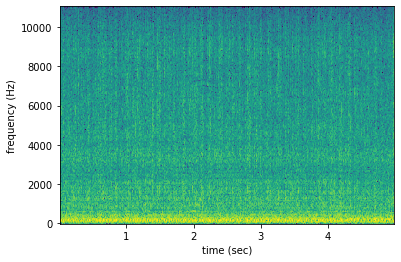

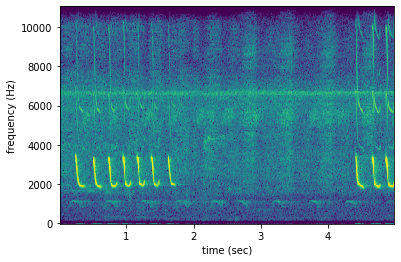

In [195]:
example_spect_audioset = os.path.join(split_path_audioset, allfilenames_audioset[5])
spect = Spectrogram.from_audio(Audio.from_file(example_spect_audioset))
spect.plot()

example_spect_xenocanto = os.path.join(split_path_xenocanto, allfilenames_bird[5])
spect = Spectrogram.from_audio(Audio.from_file(example_spect_xenocanto))
spect.plot()

# Labelling Dataset

In order to use a binary bird classifier with a CNN, we need to label the audio files we input to see if it has a bird or not. The dataset we will be using to train the CNN will ultimately have audio files from AudioSet and Xeno Canto data. Let us label the data accurately

In [262]:
print(allfilenames_audioset[0:5])
print(allfilenames_bird[0:5])

new_allfilenames_audioset = allfilenames_audioset[0:len(allfilenames_bird)]
allfilenames = new_allfilenames_audioset + allfilenames_bird
assert (len(new_allfilenames_audioset) == len(allfilenames_bird))

['ItjJk-56bF4_0.000 - 0s_5s.wav', 'ItjJk-56bF4_0.000 - 5s_10s.wav', '06Nq51sogmQ_10.000 - 0s_5s.wav', '06Nq51sogmQ_10.000 - 5s_10s.wav', '06si40RVDco_30.000 - 0s_5s.wav']
['XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris - 0s_5s.mp3', 'XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris - 5s_10s.mp3', 'XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris - 10s_15s.mp3', 'XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris - 15s_20s.mp3', 'XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris - 20s_25s.mp3']


Check that the splitted files are splitted correctly through spectrograms.

Since we are using xeno canto data (which is labelled data - bird and not bird), we need to label each of these files. In order to do so, we extract this information from the filename. Note that all the xeno canto data starts with 'XC'. 

In [385]:
def label_files(file_list): 
    bird_present_list = []
    bird_absent_list = []
    bird_species_list = []
    for f in file_list: 
        if f[:2] == 'XC' and os.path.splitext(f)[1]=='.mp3':
            bird_present_list.append(1)
            bird_absent_list.append(0)
            bird_species = os.path.splitext(f.split("-",1)[1].strip())[0]
            bird_species_list.append(''.join(bird_species.split('-')[:-1]).strip())
        else:
            bird_present_list.append(0)
            bird_absent_list.append(1)
            bird_species_list.append('N/A')
    return bird_species_list, bird_present_list, bird_absent_list

In [387]:
example_list = ['XC22019 - Blue-crowned Trogon - Trogon curucui - 5s_10s.mp3']
bird_species, bird_present_list, bird_absent_list = label_files(example_list)
print(bird_species)

['Bluecrowned Trogon  Trogon curucui']


In [388]:
bird_species_list, bird_present_list, bird_absent_list = label_files(allfilenames)

print(len(allfilenames))
assert(len(allfilenames)==len(bird_present_binary))
assert(len(bird_species_list)==len(bird_present_binary))

5602


## Put all this data into a Pandas dataframe
There would be a pandas dataframe that would include filenames, the timestamp of the file, if a bird is present in the file, and the bird species.

In [402]:
labels = {'Filenames': allfilenames,
        'Bird present': bird_present_list,
        'Bird absent': bird_absent_list,
        'Bird species': bird_species_list
        }

df = pd.DataFrame(labels, columns = ['Filenames', 'Bird present', 'Bird absent', 'Bird species'])
label_dict = {0:'bird-absent', 1:'bird-present'}

print(df.head(10))
print(df.tail(10))
print(label_dict)

                         Filenames  Bird present  Bird absent Bird species
0    ItjJk-56bF4_0.000 - 0s_5s.wav             0            1          N/A
1   ItjJk-56bF4_0.000 - 5s_10s.wav             0            1          N/A
2   06Nq51sogmQ_10.000 - 0s_5s.wav             0            1          N/A
3  06Nq51sogmQ_10.000 - 5s_10s.wav             0            1          N/A
4   06si40RVDco_30.000 - 0s_5s.wav             0            1          N/A
5  06si40RVDco_30.000 - 5s_10s.wav             0            1          N/A
6   076qdKSC8nU_30.000 - 0s_5s.wav             0            1          N/A
7  076qdKSC8nU_30.000 - 5s_10s.wav             0            1          N/A
8   07mCK08xGRc_10.000 - 0s_5s.wav             0            1          N/A
9   07rwFurzpw8_21.000 - 0s_5s.wav             0            1          N/A
                                              Filenames  Bird present  \
5592  XC97444 - Acre Tody-Tyrant - Hemitriccus cohnh...             1   
5593  XC97444 - Acre Tody-Tyr

Ensure that the 'Filenames' column in the pandas dataframe has a path to the file. Note that we saved all the files into split files.

In [403]:
print(split_path_audioset)
print(split_path_xenocanto)
print(len(allfilenames))

/media/e4e/Rainforest_Data1/audioset_nonbird_split
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split
5602


In [404]:
for i in range(len(allfilenames)): 
    if allfilenames[i][:2] == 'XC' and os.path.splitext(allfilenames[i])[1]=='.mp3':
        df.loc[i,'Filenames'] = os.path.join(split_path_xenocanto, allfilenames[i])
        print(df.loc[i, "Filenames"])
    else: 
        df.loc[i,'Filenames'] = os.path.join(split_path_audioset, allfilenames[i])

/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris - 0s_5s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris - 5s_10s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris - 10s_15s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris - 15s_20s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris - 20s_25s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC47568 - White-winged Becard - Pachyramphus polychopterus nigriventris - 25s_30s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC47

/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC40220 - Rufous Twistwing - Cnipodectes superrufus - 35s_40s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC40220 - Rufous Twistwing - Cnipodectes superrufus - 40s_45s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC40220 - Rufous Twistwing - Cnipodectes superrufus - 45s_50s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC40220 - Rufous Twistwing - Cnipodectes superrufus - 50s_55s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC40220 - Rufous Twistwing - Cnipodectes superrufus - 55s_60s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC40221 - Rufous Twistwing - Cnipodectes superrufus - 0s_5s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC40221 - Rufous Twistwing - Cnipodectes superrufus - 5s_10s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdc

/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91321 - Paint-billed Crake - Neocrex erythrops - 100s_105s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91321 - Paint-billed Crake - Neocrex erythrops - 105s_110s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91321 - Paint-billed Crake - Neocrex erythrops - 110s_115s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91321 - Paint-billed Crake - Neocrex erythrops - 115s_120s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91321 - Paint-billed Crake - Neocrex erythrops - 120s_125s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91321 - Paint-billed Crake - Neocrex erythrops - 125s_130s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91322 - Paint-billed Crake - Neocrex erythrops - 0s_5s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Spl

/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91495 - Chestnut-headed Crake - Anurolimnas castaneiceps - 15s_20s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91495 - Chestnut-headed Crake - Anurolimnas castaneiceps - 20s_25s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91495 - Chestnut-headed Crake - Anurolimnas castaneiceps - 25s_30s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91495 - Chestnut-headed Crake - Anurolimnas castaneiceps - 30s_35s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91495 - Chestnut-headed Crake - Anurolimnas castaneiceps - 35s_40s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91495 - Chestnut-headed Crake - Anurolimnas castaneiceps - 40s_45s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91495 - Chestnut-headed Crake - Anurolimnas castaneiceps - 45s_50s.mp3
/media

/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91576 - Grey-lined Hawk - Buteo nitidus - 30s_35s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91576 - Grey-lined Hawk - Buteo nitidus - 35s_40s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91576 - Grey-lined Hawk - Buteo nitidus - 40s_45s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91576 - Grey-lined Hawk - Buteo nitidus - 45s_50s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91576 - Grey-lined Hawk - Buteo nitidus - 50s_55s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91576 - Grey-lined Hawk - Buteo nitidus - 55s_60s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91576 - Grey-lined Hawk - Buteo nitidus - 60s_65s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91576 - Grey-lined Hawk - Buteo nitidus - 65s_70s.mp3


/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91692 - Yungas Tyrannulet - Phyllomyias weedeni - 175s_180s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91692 - Yungas Tyrannulet - Phyllomyias weedeni - 180s_185s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91693 - Yungas Tyrannulet - Phyllomyias weedeni - 0s_5s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91693 - Yungas Tyrannulet - Phyllomyias weedeni - 5s_10s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91693 - Yungas Tyrannulet - Phyllomyias weedeni - 10s_15s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91693 - Yungas Tyrannulet - Phyllomyias weedeni - 15s_20s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split/XC91693 - Yungas Tyrannulet - Phyllomyias weedeni - 20s_25s.mp3
/media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno_Canto_Birdcalls_Split

In [405]:
print(df.head(10))
print(df.tail(10))

                                           Filenames  Bird present  \
0  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
1  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
2  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
3  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
4  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
5  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
6  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
7  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
8  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
9  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   

   Bird absent Bird species  
0            1          N/A  
1            1          N/A  
2            1          N/A  
3            1          N/A  
4            1          N/A  
5            1          N/A  
6            1     

Let us export the dataframe into a csv to ensure that it is labelling the files correctly. 

In [406]:
df.to_csv('dataframe_binary_bird.csv')

# Machine learning: training

Biologists are increasingly using acoustic recorders to study species of interest. Many bioacousticians want to determine the identity of the sounds they have recorded; a variety of manual and automated methods exist for this purpose. Automated methods can make it easier and faster to quickly predict which species or sounds are in one's recordings.

Using a process called machine learning, bioacousticians can create (or "train") algorithms that can predict the identities of species vocalizing in acoustic recordings. These algorithms, called classifiers, typically do not identify sounds using the recording alone. Instead, they use image recognition techniques to identify sounds in spectrograms created from short segments of audio.

This tutorial will guide you through the process of training a simple classifier for a single species. To download the tutorial as a Jupyter Notebook and run it on your own computer, click the "Edit on GitHub" button at the top right of the tutorial. You will have to [install OpenSoundscape](installation.html#installation) to use the tutorial.

Import the following machine learning-related modules. OpenSoundscape uses PyTorch to do machine learning.

In [407]:
import torch
import torch.nn
import torch.optim
import torchvision.models

Lastly, use a few miscellaneous functions.

In [408]:
# For interacting with paths on the filesystem
import os.path
from pathlib import Path
from sklearn.model_selection import train_test_split

# For handling output of the training function
import io
from contextlib import redirect_stdout

## Prepare audio data

### Download labeled audio files

Training a machine learning model requires some pre-labeled data. These data, in the form of audio recordings or spectrograms, are labeled with whether or not they contain the sound of the species of interest. These data can be obtained from online databases such as Xeno-Canto.org, or by labeling one's own ARU data using a program like Cornell's "Raven" sound analysis software.

For ML pipelines, we need a training, validation, and test set. 
Outline: 
- Use audio augmented data of the actual test set for the training and validation set (split)
- Then use the actual test set (collection of Xeno Canto data and Audioset) for the test set 

1. Training set: sample of data used to fit the model AKA the actual dataset that we use to train the model (audio augmented set of data)
2. Validation: sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters
3. Test set: sample of data used to provide an unbiased evaluation of a final model fit on the training dataset (usually unlabelled data)

Sources: 
https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7 

### Audio Augmentation
Reference for audio augmentation as seen here: https://github.com/UCSD-E4E/passive-acoustic-biodiversity/blob/master/Audio_Data_Augmentation/Data_Augmentation_Tutorial.ipynb

In [409]:
print(len(df))
df.head()

5602


Filenames  Bird present  \
0  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
1  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
2  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
3  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
4  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   

   Bird absent Bird species  
0            1          N/A  
1            1          N/A  
2            1          N/A  
3            1          N/A  
4            1          N/A

In [410]:
df = df[["Filenames", "Bird present", "Bird absent"]]
print(df.head(5))

                                           Filenames  Bird present  \
0  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
1  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
2  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
3  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
4  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   

   Bird absent  
0            1  
1            1  
2            1  
3            1  
4            1  


In [411]:
train_df, valid_df = train_test_split(df, train_size=0.8, stratify=df['Bird present'])

#print(train_df['Filenames'].head(5))
#print(train_df['Bird present'].head(5))

In [412]:
num_samples = df.shape[0]
num_present = sum(df['Bird present'] == 1)
print(f"Fraction of original dataframe with bird present: {num_present/num_samples:.2f}")

num_train_samples = train_df.shape[0]
num_train_present = sum(train_df['Bird present'] == 1)
print(f"Fraction of train samples with bird present: {num_train_present/num_train_samples:.2f}")
    
num_valid_samples = valid_df.shape[0]
num_valid_present = sum(valid_df['Bird present'] == 1)
print(f"Fraction of train samples with bird present: {num_valid_present/num_valid_samples:.2f}")


Fraction of original dataframe with bird present: 0.50
Fraction of train samples with bird present: 0.50
Fraction of train samples with bird present: 0.50


### Format as `SingleTargetAudioDataset`s

Turn these dataframes into "Datasets" using the `SingleTargetAudioDataset` class. Once they are set up in this class, they can be used by the training algorithm. Data augmentation could be applied in this step, but is not demonstrated here; for more information, see the [relevant API documentation](api.html#opensoundscape.datasets.SingleTargetAudioDataset).

To use this class, specify the names of the relevant columns in the dataframes:

In [413]:
train_dataset = SingleTargetAudioDataset(
    df=train_df, label_dict=None, label_column='Bird present', filename_column='Filenames')
valid_dataset = SingleTargetAudioDataset(
    df=valid_df, label_dict=None, label_column='Bird present', filename_column='Filenames')

In [414]:
print(train_dataset)
print(valid_dataset)

## Train the machine learning model
Next, set up the architecture of the machine learning model and train it. 

### Set up model architecture
The model architecture is a neural network. Neural networks are so-named for their loose similarity to neurons. Each **neuron** takes in a small amount of data, performs a transformation to the data, and passes it on with some weight to the next neuron. Neurons are usually organized in **layers**; each neuron in one layer can be connected to one or multiple neurons in the next layer. Complex structures can arise from this series of connections.

The neural network used here is a combination of a feature extractor and a classifier. The **feature extractor** is a convolutional neural network (CNN). CNNs are a special class of neural network commonly used for image classification. They are able to interpret pixels that are near each other to identify shapes or textures in images, like lines, dots, and edges. During the training process, the CNN learns which shapes and textures are important for distinguishing between different classes.

The specific CNN used here is `resnet18`, using the `pretrained=True` option. This means that the model loaded is a version that somebody has already trained on another image dataset called ImageNet, so it has a head start on understanding features commonly seen in images. Although spectrograms aren't the same type of images as the photographs used in ImageNet, using the pretrained model will allow the model to more quickly adapt to identifying spectrograms.

In [415]:
model = torchvision.models.resnet18(pretrained = True)

Although we refer to the whole neural network as a classifier, the part of the neural network that actually does the species classification is its `fc`, or "fully connected," layers. This part of the neural network is called "fully connected" because it consists of several layers of neurons, where every neuron in each layer is connected to every other neuron in its adjacent layers.

These layers come after the CNN layers, which have already interpreted an image's features. The `fc` layers then use those interpretations to classify the image. The number of output features of the CNN, therefore, is the number of input features of the `fc` layers:

In [416]:
model.fc.in_features

512

Use a `Linear` classifier for the `fc`. To set up the `Linear` classifier, identify the input and output size for this classifier. As described above, the `fc` takes in the outputs of the feature extractor, so `in_features = model.fc.in_features`. The model identifies one species, so it has to be able to output a "present" or "absent" classification. Thus, `out_features=2`. A multi-species model would use `out_features=number_of_species`.

In [417]:
model.fc = torch.nn.Linear(in_features = model.fc.in_features, out_features = 2)


### Train the model

Next, create set up a directory in which to save results.

In [418]:
results_path = Path('/media/e4e/Rainforest_Data1/model_train_results')

if not results_path.exists(): results_path.mkdir()


In [419]:
print(results_path)

/media/e4e/Rainforest_Data1/model_train_results


The scikit-learn function may throw errors when calculating metrics; the following code will silence them.

In [420]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Finally, run the model training with the following parameters:
* `save_dir`: the directory in which to save results (which is created if it doesn't exist)
* `model`: the model set up in the previous cell
* `train_dataset`: the training dataset created using `SingleTargetAudioDataset`
* `optimizer`: the optimizer to use for training the algorithm
* `loss_fn`: the loss function used to assess the algorithm's performance during training
* `epochs`: the number of times the model will run through the training data
* `log_every`: how frequently to save performance data and save intermediate machine learning weights (`log_every=1` will save every epoch)

The `train` function allows the user to control more parameters, but they are not demonstrated here. For more information, see the [train API](http://opensoundscape.org/en/latest/api.html#module-opensoundscape.torch.train).

In [421]:
train_outputs = io.StringIO()
print(train_outputs)

with redirect_stdout(train_outputs):
    train(
        save_dir = results_path,
        model = model,
        train_dataset = train_dataset,
        valid_dataset = valid_dataset,
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-3),
        loss_fn = torch.nn.CrossEntropyLoss(),
        epochs=1,
        log_every=1,
        print_logging=True
    )


## Evaluate model performance
When training is complete, it is important to check the training results to see how well the model identifies sounds. This model was only trained on a limited amount of data, so the model is expected to not be usable--it is for demonstration purposes only.

The outputs of the training function were saved to `train_outputs`. Check out the first 100 characters of this output.

Notes on the statistics: 
- loss: In neural network, we want to minimize the error and the objective function for this is called a loss function. The value calculated by the loss function is referred to as "loss" 
- accuracy: Accuracy is the fraction of prediction our model got right aka the number of correct predictions / total number of predictions
- precision: Answers the question: what proportion of positive identifications was actually correct? A model that produces no false positives (e.g. labels an audio file as a bird but does not contain any bird sounds) would have a precision of 1.0. Equation: TP / (TP + FP) 
- recall: Answers the question: what proportion of actual positives was identified correctly? A model that produces no false negatives has a recall of 1.0. So, in equation form: TP/ TP + FN
- f1: A metric that relies on both precision and recall. 

Resources: 
- https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall 

In [369]:
source_text = train_outputs.getvalue()
print(source_text)

Epoch 0
  Training.
  Validating.
  Validation results:
    train_loss: 0.005679945712858182
    train_accuracy: 1.0
    train_precision: [0.50011158 0.49988842]
    train_recall: [0.50011158 0.49988842]
    train_f1: [0.50011158 0.49988842]
    valid_accuracy: 0.22836752899197146
    valid_precision: [0.00267618 0.22569135]
    valid_recall: [0.00267618 0.22569135]
    valid_f1: [0.00267618 0.22569135]
  Saved results to /media/e4e/Rainforest_Data1/model_train_results/epoch-0.tar.
Epoch 1
  Training.
  Validating.
  Validation results:
    train_loss: 0.003004054174929129
    train_accuracy: 1.0
    train_precision: [0.50011158 0.49988842]
    train_recall: [0.50011158 0.49988842]
    train_f1: [0.50011158 0.49988842]
    valid_accuracy: 0.25334522747546834
    valid_precision: [0.00267618 0.25066905]
    valid_recall: [0.00267618 0.25066905]
    valid_f1: [0.00267618 0.25066905]
  Saved results to /media/e4e/Rainforest_Data1/model_train_results/epoch-1.tar.
Training complete.



These functions help to parse the log text. They simply extract the resulting "metric" in each epoch. Metrics include accuracy, precision, recall, and f1 score.

In [422]:
def extract_all_lines_containing(source_text, str_to_extract):
    """Case-sensitive search for lines containing str_to_extract"""
    finished = False
    lines = source_text.split('\n')
    extract_lines = [line for line in lines if str_to_extract in line]
    return extract_lines

def strip_log(log, sep=':     '):
    return log.split(sep)[1]

def get_metric_from_log(source_text, metric):
    if 'precision' in metric or 'recall' in metric:
        return [float(strip_log(line, sep=': ').strip('[]').split()[1]) for line in extract_all_lines_containing(source_text, metric)]
    return [float(strip_log(line, sep=': ')) for line in extract_all_lines_containing(source_text, metric)]

Plot the validation accuracy each epoch. These results will look different every time the model is trained, as it is a stochastic process (randomly determined).

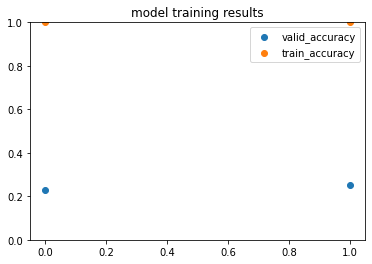

In [424]:
metrics_to_plot = ['valid_accuracy', 'train_accuracy']
fig, ax = plt.subplots(1, 1)
for metric in metrics_to_plot:
    results = get_metric_from_log(source_text, metric)
    ax.scatter(range(len(results)), results)
ax.set_ylim(0, 1)
ax.set_title('model training results')
ax.legend(metrics_to_plot)
plt.show()

Lastly, this command "cleans up" by deleting all the downloaded files and results. Only run this if you are ready to remove the results of this analysis.

In [425]:
#import shutil
# Delete results
#shutil.rmtree(results_path)

# Machine learning: predict

In [426]:
print(df.head(5))

                                           Filenames  Bird present  \
0  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
1  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
2  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
3  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   
4  /media/e4e/Rainforest_Data1/audioset_nonbird_s...             0   

   Bird absent  
0            1  
1            1  
2            1  
3            1  
4            1  


In [427]:
test_dataset = SingleTargetAudioDataset(
    df = df,
    filename_column = "Filenames",
    label_dict = label_dict,
)

In [428]:
from opensoundscape.torch.predict import predict
prediction_df = predict(model, test_dataset, apply_softmax=True, label_dict=label_dict)

In [429]:
prediction_df.to_csv('prediction_results.csv')

Let us know analyze the prediction results: 
- Average of bird present and bird not present in the file from the audioset data versus from the Xeno Canto data
- Make a confusion matrix
- If still doesn't produce good results, try without softmax

In [430]:
prediction_df.head(3)

bird-absent  bird-present
/media/e4e/Rainforest_Data1/audioset_nonbird_sp...     0.005032      0.994968
/media/e4e/Rainforest_Data1/audioset_nonbird_sp...     0.029052      0.970948
/media/e4e/Rainforest_Data1/audioset_nonbird_sp...     0.349771      0.650229

In [431]:
# assign column name for the first 
prediction_df.reset_index(inplace=True)
prediction_df.index.name = 'Filenames'

In [432]:
print(prediction_df.columns)

Index(['index', 'bird-absent', 'bird-present'], dtype='object')


In [433]:
print(int(len(prediction_df.index)/2))

# under the assumption that there are equal amounts of xeno canto and audioset data
audioset_df = prediction_df[:int(len(prediction_df.index)/2)]
print(audioset_df.head(5))
xenocanto_df = prediction_df[int(len(prediction_df.index)/2):]
print(xenocanto_df.head(5))

2801
                                                       index  bird-absent  \
Filenames                                                                   
0          /media/e4e/Rainforest_Data1/audioset_nonbird_s...     0.005032   
1          /media/e4e/Rainforest_Data1/audioset_nonbird_s...     0.029052   
2          /media/e4e/Rainforest_Data1/audioset_nonbird_s...     0.349771   
3          /media/e4e/Rainforest_Data1/audioset_nonbird_s...     0.003836   
4          /media/e4e/Rainforest_Data1/audioset_nonbird_s...     0.004109   

           bird-present  
Filenames                
0              0.994968  
1              0.970948  
2              0.650229  
3              0.996164  
4              0.995891  
                                                       index  bird-absent  \
Filenames                                                                   
2801       /media/e4e/Rainforest_Data1/Madre_de_Dios_Xeno...     0.110348   
2802       /media/e4e/Rainforest_Data1/Mad

In [434]:
print("audioset data")
print("average for bird-present:", audioset_df["bird-present"].mean())
print("average for bird-absent:", audioset_df["bird-absent"].mean())
print()

print("xenocanto data")
print("average for bird-present:", xenocanto_df["bird-present"].mean())
print("average for bird-absent:", xenocanto_df["bird-absent"].mean())

audioset data
average for bird-present: 0.9346179915298646
average for bird-absent: 0.06538200924750949

xenocanto data
average for bird-present: 0.7892433077893933
average for bird-absent: 0.2107566924608986
